In [1]:
import pandas as pd
import numpy as np
import sys
from fastparquet import ParquetFile

%matplotlib inline

In [2]:
# DISPLAY SETTINGS
pd.set_option("display.max.columns", None)   # Display all columns
pd.set_option("display.max.rows", None)      # Display all rows
pd.set_option("display.precision", 2)        # Display 2 decimal places

# Series

## Create

In [37]:
# From list
s1 = pd.Series([10, 20],
              index=['a','b'])   # Index is optional

# From dictionary
s2 = pd.Series({"d": 40, "e": 50})

## Explore

In [38]:
s1

a    10
b    20
dtype: int64

In [39]:
# Access Index
s1.index, s2.keys()

(Index(['a', 'b'], dtype='object'), Index(['d', 'e'], dtype='object'))

In [40]:
# Access Values
s2.values

array([40, 50])

In [41]:
# Check if an index exists
"a" in s2

False

# Dataframes

## Create

In [42]:
#  From Series
df = pd.DataFrame({"c1": s1, "c2": s2})
df

,c1,c2
a,10.0,NaN
b,20.0,NaN
d,NaN,40.0
e,NaN,50.0


In [2]:
# From dictionary
dictTest={'key1':1,'key2':'value2'}
dfDict = pd.DataFrame(dictTest,index=['i',])
dfDict

,key1,key2
i,1,value2


In [ ]:
# From clipboard
df = pd.read_clipboard()

In [3]:
# From parquet file
pf=ParquetFile('../data/address_latlon.parquet')
df=pf.to_pandas()

pf=ParquetFile('../data/purpleairdaily.parquet')
df1=pf.to_pandas()

pf=ParquetFile('../data/thingspeak.parquet')
df2=pf.to_pandas()

In [64]:
# https://www.kaggle.com/manasgarg/ipl/data?select=matches.csv
df3 = pd.read_csv('../data/matches.csv', delimiter=',')

In [ ]:
# Multiple files
from glob import glob

files = sorted(glob('data/*.csv'))
pd.concat((pd.read_csv(file) for file in files), ignore_index=True)    # Row-wise concat
pd.concat((pd.read_csv(file) for file in files), axis=1)    # Column-wise concat

In [78]:
# From web urls
import io
import requests

# url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv"
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
csv_content=requests.get(url).content
df=pd.read_csv(io.StringIO(csv_content.decode('latin_1')))

#### Existing Datasets

https://stackoverflow.com/questions/28417293/sample-datasets-in-pandas

In [3]:
import seaborn as sns

In [33]:
# https://github.com/mwaskom/seaborn-data
tips = sns.load_dataset('tips')
cars = sns.load_dataset('mpg')
titanic = sns.load_dataset('titanic')
flights = sns.load_dataset('flights')
exercise = sns.load_dataset('exercise')
diamonds = sns.load_dataset('diamonds')
planets = sns.load_dataset('planets')
dots = sns.load_dataset('dots')
car_crashes = sns.load_dataset('car_crashes')
fmri = sns.load_dataset('fmri')
geyser = sns.load_dataset('geyser')

In [57]:
# https://scikit-learn.org/stable/datasets/index.html#
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

In [62]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = pd.Series(data.target)

In [40]:
# from pydataset import data
# iris = data('iris')

## Explore

In [76]:
# Shallow copy a dataframe
df = tips.copy()

In [7]:
len(df), len(df1), len(df2)

(244, 146017, 133199)

In [8]:
df.shape, df1.shape, df2.shape

((244, 7), (146017, 16), (133199, 19))

In [79]:
df.head(2)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.28,40.29,NYK,Knicks,68,1300.0,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0,1306.72,41.71,TRH,Huskies,66,1300.0,1293.28,A,W,0.36,NaN


In [7]:
df.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [45]:
# Get row and column names (axes)
# df.axes
df.axes[1]  # This is same as df.keys()

Index(['c1', 'c2'], dtype='object')

In [11]:
df.describe()   # Display stats only for numeric columns

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [13]:
df.describe(include = np.object)   # Display descriptive stats for object columns

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [70]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
# Get index position of a column in a dataframe
df.columns.get_loc('smoker')

In [9]:
# Get frequency of values for a column
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [16]:
# Min and Max
df[df['time']=='Dinner'].tip.agg(("min", "max"))

min     1.0
max    10.0
Name: tip, dtype: float64

In [69]:
tipNotNull = df[df.tip.notnull()]
tipNotNull.shape

(244, 7)

In [16]:
df.isnull().sum()    # Find nulls
# df.isna().mean()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [14]:
df.isnull().sum().sum()   # Total nulls across all columns

1324

In [15]:
df2.columns

Index(['created_at_x', '0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um',
       'pm1_0', 'pm10_0', 'sensorhash', 'created', 'pm1_0_atm', 'pm2_5_atm',
       'pm10_0_atm', 'uptime', 'rssi', 'temperature', 'humidity',
       'pm2_5_cf_1'],
      dtype='object')

In [80]:
#  Check data consistency 
# Use 'empty' to check if certain value combinations return empty dataframe
df[(df["pts"] > df["opp_pts"]) & (df["game_result"] != 'W')].empty

True

#### Visualize

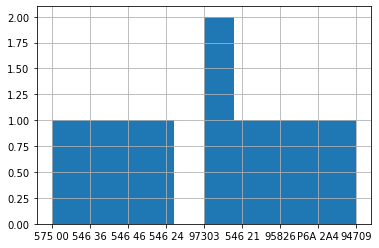

In [16]:
# Histogram
df['zipcode'][:10].hist()

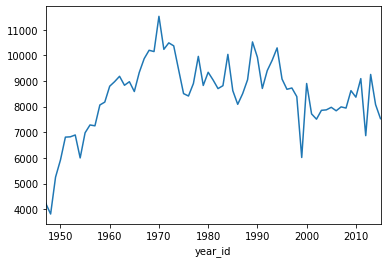

In [81]:
# Using plot
df[df["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

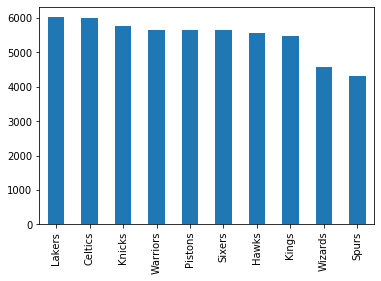

In [82]:
df["fran_id"].value_counts().head(10).plot(kind="bar")

## Slice and Dice

#### Filter Data

In [ ]:
# Multiple values in a single column
df1[df1.sensor_id.isin([123,456])]

In [8]:
# Display first few values of a specific column (address_latlon.parquet)
df2['created_at_x'].head(2)

index
0    2019-10-27T00:00:00Z
1    2019-10-27T00:10:00Z
Name: created_at_x, dtype: object

#### Subset by Label and Positional Index

In [59]:
df.loc['a'] # Lable Index
df.iloc[0]  # Positional Index

c1    10.0
c2     NaN
Name: a, dtype: float64

In [60]:
df.loc['a':'d']
df.iloc[0:2]

,c1,c2
a,10.0,NaN
b,20.0,NaN


In [57]:
df.iloc[0]["c1"]
df.loc['a']["c2"]
df.loc['a',"c2"]
df.loc['d'][["c1", "c2"]]
df.loc['a',["c1","c2"]]

c1     NaN
c2    40.0
Name: d, dtype: float64

#### Subset of Columns by data type

In [17]:
# df.select_dtypes(include = 'number').head()    # Numeric columns only
# df.select_dtypes(include='object').head()      # Object columns only
df.select_dtypes(include=['number', 'object']).head(2)    # Number and Object columns only

,city,country,county,lat,lon,state,zipcode
0,Kardia,Greece,None,40.47,22.99,None,575 00
1,Thessaloniki,Greece,None,40.63,22.96,None,546 36


In [18]:
df.select_dtypes(exclude='object').head(2)    # Exclude float columns

,lat,lon
0,40.47,22.99
1,40.63,22.96


#### Subset by column name

In [19]:
df1a = df1[['a_h', 'high_reading_flag', 'hidden', 'datetime', 'sensorhash']]
df1 = df1[['device_loc_typ', 'is_owner', 'sensor_id', 'sensor_name',  'parent_id', 'lat', 'lon', 'thingspeak_primary_id', 'thingspeak_primary_id_read_key', 'thingspeak_secondary_id',
                                          'thingspeak_secondary_id_read_key', 'sensorhash']]

#### Dropping columns and values

In [ ]:
# Drop rows if any NaN values are present
df = df.dropna(axis = 0)
# Drop columns if any NaN values are present
df = df.dropna(axis = 1)
# Drop columns in which more than 5% of values are missing
df.dropna(thresh=len(df)*0.95, axis=1)

# Drop columns where all rows are null
df.dropna(axis='columns', how='all', inplace=True)
# Drop rows where all columns are null
df.dropna(how='all', inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [20]:
# Drop unwanted columns
df2.drop(['pm2_5_cf_1', 'pm2_5_atm', 'pm10_0_atm'], axis = 1, inplace=True)

#### Filter Based on String Operations

In [77]:
df_lnch = df.time.str.startswith("Lun")
df_lnch = df.time.str.endswith("ch")
df_lnch.shape

(244,)

## Transformations

### Rename

In [7]:
# Rename selected columns
df = df.rename(columns={'total_bill':'bill','smoker':'smoker_flag'})
df.columns

Index(['bill', 'tip', 'sex', 'smoker_flag', 'day', 'time', 'size'], dtype='object')

### Replacements

In [ ]:
# Replace all NaN values
df.fillna(value='Missing')

# To replace NaN values with the values in the previous row.
df.fillna(axis=0, method='ffill', inplace=True)

# To replace NaN values with the values in the previous column.
df.fillna(axis=1, method='ffill', inplace=True)

# Replace with the values in the next row
df.fillna(axis=0, method='bfill', inplace=True)

# Replace with the values in the next column
df.fillna(axis=1, method='bfill', inplace=True)

In [21]:
# Replace string "nan" with np.nan
df2[['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0','pm10_0', 'created', 'pm1_0_atm', 'uptime',
               'rssi', 'temperature', 'humidity']] = df2[['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0',
               'pm10_0', 'created', 'pm1_0_atm', 'uptime', 'rssi', 'temperature', 'humidity']].replace("nan", np.nan, regex=True)

In [ ]:
# To replace NaN values with the mean
df2['0_3um'].fillna(value=df2['0_3um'].mean(), inplace=True)

# replace with static values
df3.replace(to_replace='Calcutta', value='Kolkata', inplace=True)

# replace whole word matches only
df['scenario'] = df['scenario'].str.replace(r'\bPY\b','PY_Actual')

# replace multiple characters in a column with a single value
df['flex_field_1_value'] = df['flex_field_1_value'].str.replace(',|\$','')

#### Conversions

In [74]:
# Specify categorical columns - MEMORY SAVINGS
df["city"] = pd.Categorical(df["city"])

In [29]:
# Change index of dataframe
tips.set_index('sex').head(2)

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,16.99,1.01,No,Sun,Dinner,2
Male,10.34,1.66,No,Sun,Dinner,3


In [ ]:
df2['0_5um'] = df2['0_5um'].astype(int)
df2 = df2.astype({'0_5um': 'int'})    # use dictionary format { col: dtype }

In [23]:
# use to_numeric to convert the strings with Invalid characters
df2['2_5um'] = pd.to_numeric(df['2_5um'], errors='coerce')    # Single column
df2['2_5um'] = pd.to_datetime(df['2_5um'], errors='coerce')    # Single column
# Multiple columns
df2[['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0','pm10_0', 'created', 'pm1_0_atm', 'uptime',
               'rssi', 'temperature', 'humidity']] = df2[['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0',
               'pm10_0', 'created', 'pm1_0_atm', 'uptime', 'rssi', 'temperature', 'humidity']].apply(pd.to_numeric)

df2[['high_reading_flag','sensor_id','parent_id', 'is_owner']] = df2[['high_reading_flag','sensor_id','parent_id', 'is_owner']].astype(str)

In [ ]:
# Continuous to categorical
df['AgeGroup']=pd.cut(
    df['Age'], 
    bins=[0, 13, 19, 50, sys.maxsize], 
    labels=['<12', 'Teen', 'Adult', 'Old']
)

In [14]:
# Convert numeric column names into string values and move corresponding column values into a value column
df3 = df3[['id','city','winner','win_by_runs','win_by_wickets']]
df3 = df3.melt(id_vars=['id','city','winner'],var_name='WinStatTyp',value_name='WinStatVal')

In [81]:
# Group By - retunrs series
tips.groupby(['sex','day'], sort=False)['total_bill'].sum()

sex     day 
Female  Sun      357.70
Male    Sun     1269.46
        Sat     1227.35
Female  Sat      551.05
Male    Thur     561.44
Female  Thur     534.89
Male    Fri      198.57
Female  Fri      127.31
Name: total_bill, dtype: float64

In [65]:
# Use reset_index to transform results of group by to a dataframe
tips.groupby('sex')['total_bill'].sum().reset_index()

,sex,total_bill
0,Male,3256.82
1,Female,1570.95


In [69]:
# Group By with multiple columns with multiple aggregations
# Fills cells without matching data with NaNs
result_tips_grp_multi = tips.groupby(['sex', 'day'])['total_bill'].agg([np.mean, np.median, np.sum])
result_tips_grp_multi

mean  median      sum
sex    day                         
Male   Thur  18.71   16.98   561.44
       Fri   19.86   17.21   198.57
       Sat   20.80   18.24  1227.35
       Sun   21.89   20.73  1269.46
Female Thur  16.72   13.79   534.89
       Fri   14.15   15.38   127.31
       Sat   19.68   18.36   551.05
       Sun   19.87   17.41   357.70

In [24]:
# Pivot Table - returns dataframe
tips.pivot_table(values='total_bill', index='sex', aggfunc=np.sum)

,total_bill
sex,
Male,3256.82
Female,1570.95


In [46]:
# Pivot Table with multiple columns with multiple aggregations - Group By results are better formatted for this scenario
# Can define what to show in cells without missing data - fill_value
result_tips_pivot = tips.pivot_table(values='total_bill', 
                 index=['sex', 'day'], 
                 aggfunc=[np.median, np.sum], 
                           fill_value=0)
result_tips_pivot

median        sum
            total_bill total_bill
sex    day                       
Male   Thur      16.98     561.44
       Fri       17.21     198.57
       Sat       18.24    1227.35
       Sun       20.73    1269.46
Female Thur      13.79     534.89
       Fri       15.38     127.31
       Sat       18.36     551.05
       Sun       17.41     357.70

In [42]:
# Access columns from a multi level hierarchy as above
result_tips_pivot[('median','total_bill')].head(2)

sex   day 
Male  Thur    16.98
      Fri     17.21
Name: (median, total_bill), dtype: float64

In [43]:
# Stack - creates series with multi level index
tips.set_index('sex')[['tip', 'total_bill']].iloc[:5].stack()

sex               
Female  tip            1.01
        total_bill    16.99
Male    tip            1.66
        total_bill    10.34
        tip            3.50
        total_bill    21.01
        tip            3.31
        total_bill    23.68
Female  tip            3.61
        total_bill    24.59
dtype: float64

In [44]:
# Stack on a dataframe with multi level hierarchy columns - returns a dataframe with inner level set to index
result_tips_pivot.stack()

median      sum
sex    day                             
Male   Thur total_bill   16.98   561.44
       Fri  total_bill   17.21   198.57
       Sat  total_bill   18.24  1227.35
       Sun  total_bill   20.73  1269.46
Female Thur total_bill   13.79   534.89
       Fri  total_bill   15.38   127.31
       Sat  total_bill   18.36   551.05
       Sun  total_bill   17.41   357.70

In [47]:
# To use outer level as index when stacking a dataframe with multi level hierarchy columns
result_tips_pivot_stack = result_tips_pivot.stack(level=0)
result_tips_pivot_stack

total_bill
sex    day                    
Male   Thur median       16.98
            sum         561.44
       Fri  median       17.21
            sum         198.57
       Sat  median       18.24
            sum        1227.35
       Sun  median       20.73
            sum        1269.46
Female Thur median       13.79
            sum         534.89
       Fri  median       15.38
            sum         127.31
       Sat  median       18.36
            sum         551.05
       Sun  median       17.41
            sum         357.70

In [48]:
# Unstacking a stacked dataframe
result_tips_pivot_stack.unstack()

total_bill         
                median      sum
sex    day                     
Male   Thur      16.98   561.44
       Fri       17.21   198.57
       Sat       18.24  1227.35
       Sun       20.73  1269.46
Female Thur      13.79   534.89
       Fri       15.38   127.31
       Sat       18.36   551.05
       Sun       17.41   357.70

In [70]:
# Unstacking a grouped dataframe
result_tips_grp_multi.unstack()

mean                      median                          sum  \
day      Thur    Fri    Sat    Sun   Thur    Fri    Sat    Sun    Thur   
sex                                                                      
Male    18.71  19.86  20.80  21.89  16.98  17.21  18.24  20.73  561.44   
Female  16.72  14.15  19.68  19.87  13.79  15.38  18.36  17.41  534.89   

                                  
day        Fri      Sat      Sun  
sex                               
Male    198.57  1227.35  1269.46  
Female  127.31   551.05   357.70

## Additions

#### Merge

In [24]:
df2 = pd.merge(df2, df1,  how='left', left_on=['sensorhash'], right_on=['sensorhash'])   # Based on columns
df2 = pd.merge(df2, df1a,  how='left', left_on=['sensorhash', 'created'], right_on=['sensorhash', 'datetime'])   # Based on multiple columns
df2 = pd.merge(df2, df,  how='left', left_on=['lat','lon'], right_on=['lat','lon'], suffixes=('_left', '_right'))   # Specify suffixes for common columns
df2 = pd.merge(df2, df,  how='outer', left_index=True, right_index=True)   # Based on indexes
df2 = pd.merge(df2, df,  how='right', left_index=True, right_on='lat')   # Based onindex and column

#### Concat

In [ ]:
#  Concat
newdf = pd.concat([df1,df2], axis=1, sort=false, join="inner")   # Default axis is 0, default join is full outer based on index

#### New columns

In [ ]:
# Function for conditional addition of column example below
def getTNCategory(dfrow):
#     Check if value is empty or nan
     if not dfrow.Group or pd.isna(dfrow.Group):
        return dfrow.Category
     else:
        return dfrow.Group

In [ ]:
# From existing column (s)
ts_df['created_at'] = ts_df['created_at_x'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ").strftime("%Y/%m/%dT%H:%M"))
df['MetricKeyName'] = df.apply(lambda x: (x.Category + '_' + x.Level1 + '_' + x.Metric).lower().replace(' ','_'), axis=1)

# Insert new col with static value at specified index
df3.insert(2,'match','IPL')

# Conditional addition of column
# Using lambda
sts_df['CategoryNew'] = sts_df.apply(lambda x: x.Category if not x.Group or pd.isna(x.Group) else x.Group, axis=1)
# Using another function
sts_df['CategoryNew'] = sts_df.apply(getTNCategory, axis=1)

## Save

In [ ]:
df.to_csv(sep=',',index=False)

In [ ]:
# Save list of dictionaries to csv
import csv
lstCSV = [{'name':'name1','age':25,'weight':50},
         {'name':'name2','age':50,'weight':100}]
recKeys = lstCSV[0].keys()
with open('test.csv', 'w', newline='')  as f:
    dict_writer = csv.DictWriter(f, recKeys)
    dict_writer.writeheader()
    dict_writer.writerows(lstCSV)
    
# Alternate approach using dataframe
df = pd.DataFrame(lstCSV)
with fs.open('test.csv','w') as f:
    df.to_csv(f, index=False)